<a href="https://colab.research.google.com/github/Hegazian/Deep_Learning/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)


In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


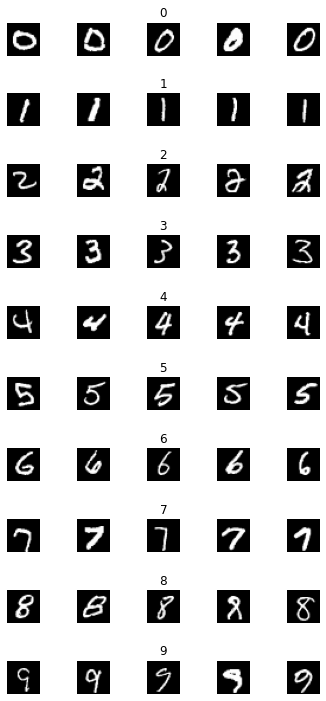

In [4]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

In [5]:
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)

In [6]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [9]:
def LeNet_model():
  model = Sequential()
  model.add(Conv2D(filters=30,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=15,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [10]:
model = LeNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [11]:
h = model.fit(x_train,y_train,batch_size=400,epochs=10,verbose=1,validation_split=0.1,shuffle=1)

Epoch 1/10
135/135 [==============================] - 1s 7ms/step - loss: 0.2253 - accuracy: 0.9277 - val_loss: 0.0636 - val_accuracy: 0.9823
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0731 - accuracy: 0.9780 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0602 - accuracy: 0.9820 - val_loss: 0.0363 - val_accuracy: 0.9905
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0412 - val_accuracy: 0.9892
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0409 - val_accuracy: 0.9888
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0428 - val_accuracy: 0.9870
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0417 - val_accuracy: 0.9897
Epoch 

Text(0.5, 0, 'epoches')

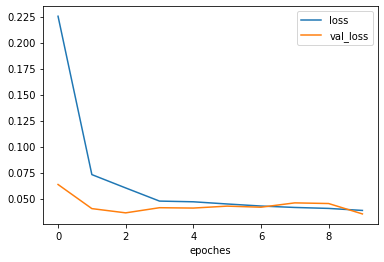

In [12]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.xlabel("epoches")

Text(0.5, 0, 'epoches')

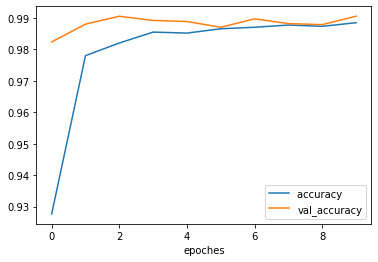

In [13]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy ', 'val_accuracy'])
plt.xlabel("epoches")

In [14]:
score = model.evaluate(x_test,y_test,verbose=0)
print("test score:",score[0])
print("test accuracy:", score[1])

test score: 0.027564922347664833
test accuracy: 0.9912999868392944


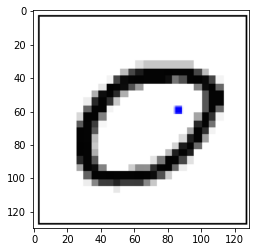

In [15]:
import requests
from PIL import Image
url2 = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-3.png'
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
url3 = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-1.png'
url4= 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url3,stream='True')
img = Image.open(response.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))

(28, 28)


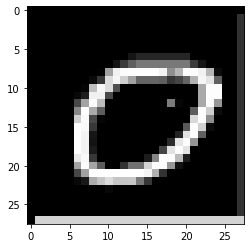

In [16]:
import cv2 
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
grey_scale = cv2.cvtColor(resized , cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(grey_scale)
print (image.shape)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [17]:
image = image /255
image = image.reshape(1,28,28,1)

In [18]:
predication = model.predict_classes(image)
print("predicted digit is:",str(predication))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit is: [0]
